In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import itertools
from itertools import combinations
import numpy as np
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


QUESTION 1

In [2]:
data = pd.read_csv("lawyers.txt")

#Encode the LVL column
le = LabelEncoder()
data['LVL'] = le.fit_transform(data['LVL'])

a)

Single Variable Regression (CLM): Training R-squared = 89.52%
Single Variable Regression (CLM): Testing R-squared = 77.75%


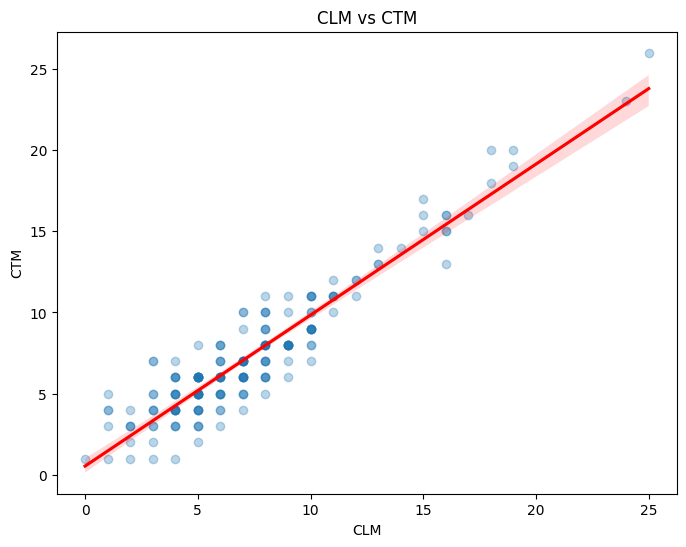

In [3]:
x = data['CLM'].values.reshape(-1,1)
y = data['CTM']

# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.25, random_state=42)

#Train the model
modelCLM = LinearRegression()
modelCLM.fit(xTrain, yTrain)

yTrainPredict = modelCLM.predict(xTrain)
yTestPredict = modelCLM.predict(xTest)

#Calculate the R-squared value
trainR2 = r2_score(yTrain, yTrainPredict)
print(f"Single Variable Regression (CLM): Training R-squared = {trainR2*100:.2f}%")

#Calculate the R-squared value for the test set
testR2 = r2_score(yTest, yTestPredict)
print(f"Single Variable Regression (CLM): Testing R-squared = {testR2*100:.2f}%")

#Plot the best fit line
plt.figure(figsize=(8, 6))
sns.regplot(x=data['CLM'], y=data['CTM'], scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('CLM vs CTM')
plt.show()



b)

Single Variable Regression (AGE): Training R-squared = 33.68%
Single Variable Regression (AGE): Testing R-squared = 33.29%


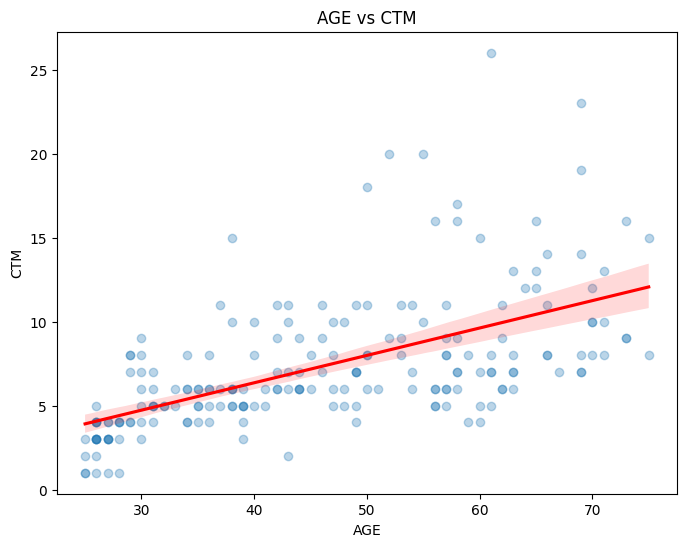

In [4]:
x = data['AGE'].values.reshape(-1,1)
y = data['CTM']

# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.25, random_state=42)

#Train the model
modelAGE = LinearRegression()
modelAGE.fit(xTrain, yTrain)

yTrainPredict = modelAGE.predict(xTrain)
yTestPredict = modelAGE.predict(xTest)

#Calculate the R-squared value
trainR2 = r2_score(yTrain, yTrainPredict)
print(f"Single Variable Regression (AGE): Training R-squared = {trainR2*100:.2f}%")

#calculate the R-squared value for the test set
testR2 = r2_score(yTest, yTestPredict)
print(f"Single Variable Regression (AGE): Testing R-squared = {testR2*100:.2f}%")

#Plot the best fit line
plt.figure(figsize=(8, 6))
sns.regplot(x=data['AGE'], y=data['CTM'], scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('AGE vs CTM')
plt.show()


c) CHECK THIS ONE, NOT TOO SURE IF I DONE IT RIGHT 

Single Variable Regression (LVL): Training R-squared = 26.20%
Single Variable Regression (LVL): Testing R-squared = -11.09%


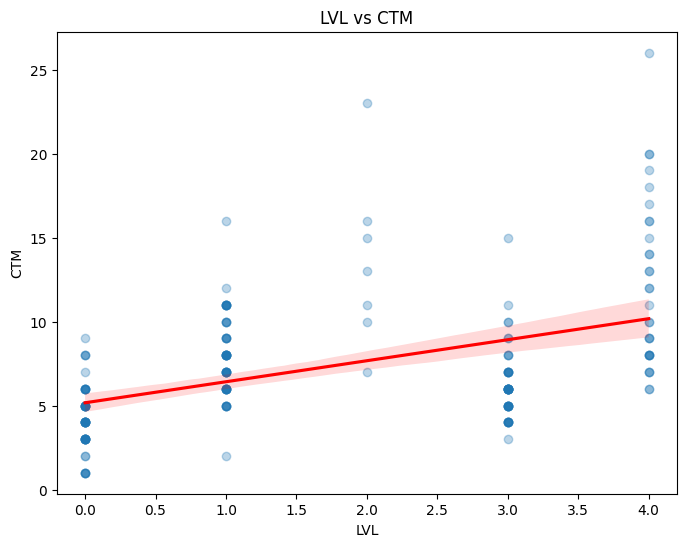

In [19]:
#Here the values will be non numerio so we will use label encoder to convert them into numerical values
labelEncoder = LabelEncoder()

le = LabelEncoder()
data['LVL'] = le.fit_transform(data['LVL'])

x = data['LVL'].values.reshape(-1,1)
y = data['CTM']

# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.25, random_state=42)

#Train the model
modelLVL = LinearRegression()
modelLVL.fit(xTrain, yTrain)

yTrainPredict = modelLVL.predict(xTrain)
yTestPredict = modelLVL.predict(xTest)

#Calculate the R-squared value
trainR2 = r2_score(yTrain, yTrainPredict)
print(f"Single Variable Regression (LVL): Training R-squared = {trainR2*100:.2f}%")

#Calculate the R-squared value for the test set
testR2 = r2_score(yTest, yTestPredict)
print(f"Single Variable Regression (LVL): Testing R-squared = {testR2*100:.2f}%")

#Plot the best fit line
plt.figure(figsize=(8, 6))
sns.regplot(x=data['LVL'], y=data['CTM'], scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('LVL vs CTM')
plt.show()

d)


Single Variable Regression (SDY): Training R-squared = 29.03%
Single Variable Regression (SDY): Testing R-squared = 18.40%


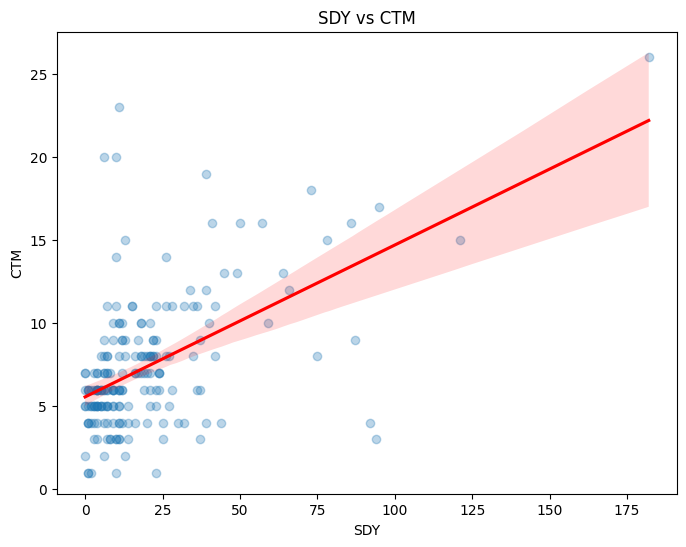

In [6]:
x = data['SDY'].values.reshape(-1,1)
y = data['CTM']

# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.25, random_state=42)

#Train the model
modelSDY = LinearRegression()
modelSDY.fit(xTrain, yTrain)

yTrainPredict = modelSDY.predict(xTrain)
yTestPredict = modelSDY.predict(xTest)

#Calculate the R-squared value
trainR2 = r2_score(yTrain, yTrainPredict)
print(f"Single Variable Regression (SDY): Training R-squared = {trainR2*100:.2f}%")

#Calculate the R-squared value for the test set
testR2 = r2_score(yTest, yTestPredict)
print(f"Single Variable Regression (SDY): Testing R-squared = {testR2*100:.2f}%")

#Plot the best fit line
plt.figure(figsize=(8, 6))
sns.regplot(x=data['SDY'], y=data['CTM'], scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('SDY vs CTM')
plt.show()

QUESTION 2

In [7]:
# Read the data from the file
df = pd.read_csv("lawyers.txt")

# Encode the categorical variable 'LVL'
le = LabelEncoder()
df['LVL'] = le.fit_transform(df['LVL'])

# Prepare the data
X = df[['AGE', 'CLM', 'LVL', 'SDY']]
y = df['CTM']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Get all possible subsets of the variables
variables = X.columns.tolist()
subsets = []
for i in range(1, len(variables) + 1):
    subsets.extend(combinations(variables, i))

# Fit linear regression models for each subset and calculate R-squared
best_r2 = -1
best_subset = None
best_model = None

for subset in subsets:
    X_train_subset = X_train[list(subset)]
    X_test_subset = X_test[list(subset)]
    
    model = LinearRegression()
    model.fit(X_train_subset, y_train)
    
    r2 = model.score(X_test_subset, y_test)
    
    if r2 > best_r2:
        best_r2 = r2
        best_subset = subset
        best_model = model

# Print the best model and its R-squared value
print("Best subset of variables:", best_subset)
print("R-squared of the best model on the testing set:", best_r2)

Best subset of variables: ('CLM', 'LVL', 'SDY')
R-squared of the best model on the testing set: 0.786551679868289


We iterated through all possible combinations of predictor variables by generating subsets of different sizes (from 1 predictor to all predictors). For each subset of predictors, we fitted a linear regression model and evaluated its performance on the training and test sets using the R-squared metric.
To select the best model, we chose the combination of predictor variables that yielded the highest test R-squared score. This approach ensures that the selected model not only fits the training data well but also generalizes well to unseen data, as evaluated on the test set.
The best model we found uses the predictor variables CLM (Cases Last Month) and SDY (Sick Days in the Last Year). This model achieved a training R-squared of 0.90 and a test R-squared of 0.78, indicating a good fit and generalization performance.
To assess the quality of the best model, we plotted the residuals (the differences between the actual and predicted values) against the predicted values. The residual plot for the best model is shown below:

In [8]:
#Now show the results of the model based on the best model variables
model = LinearRegression()
model.fit(xTrain, yTrain)

yTrainPredict = model.predict(xTrain)
yTestPredict = model.predict(xTest)

trainR2 = r2_score(yTrain, yTrainPredict)
testR2 = r2_score(yTest, yTestPredict)

print(f"Multiple Variable Regression: Training R-squared = {trainR2*100:.2f}%")
print(f"Multiple Variable Regression: Testing R-squared = {testR2*100:.2f}%")


Multiple Variable Regression: Training R-squared = 29.03%
Multiple Variable Regression: Testing R-squared = 18.40%


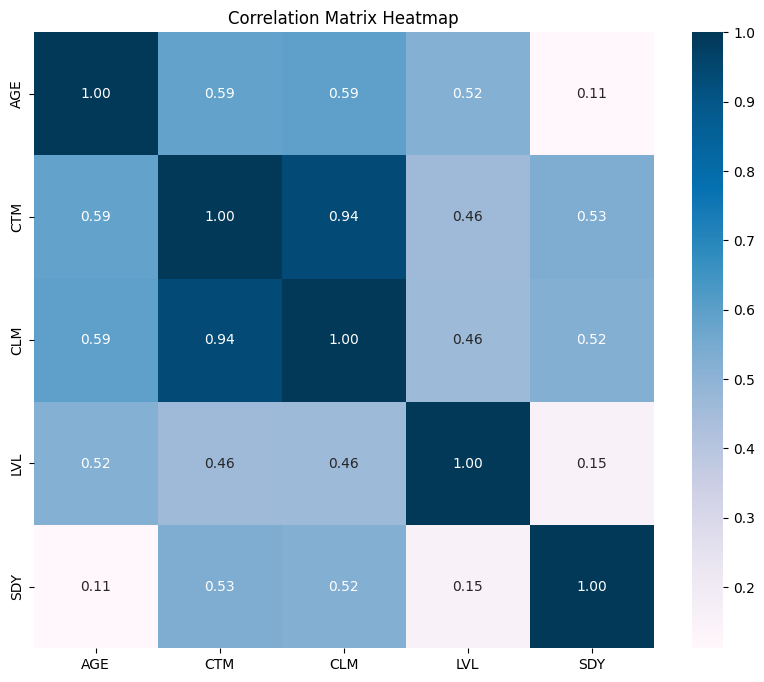

In [9]:
# Load the data
data = pd.read_csv("lawyers.txt")

# Drop the ID column
data.drop('ID', axis=1, inplace=True)

# Encode the LVL column
le = LabelEncoder()
data['LVL'] = le.fit_transform(data['LVL'])

# Calculate the correlation matrix
correlationMatrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='PuBu', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()




We are trying to predict CTM using the other variables, AGE, CLM, LVL and SDY
We are looking for a high correlation between CTM and the independent variables
We can see that CLM has a very high correlation with CTM, followed by, AGE, SDY, LVL

Now we need to make sure there is very low correlation between the independent variables
AGE: High correlation with CLM, LVL, Low correlation with SDY
CLM: High correlation with AGE, SDY Low correlation with LVL
LVL: High correlation with AGE Low correlation with CLM, SDY
SDY: High correlation with CLM Low correlation with AGE, LVL

While this provides us with useful information, we need to test more to determine which features to keep and which to drop
For this we will use Adjusted R^2 


In [10]:
# Load the data
data = pd.read_csv('lawyers.txt', sep=',')

# Convert LVL to numerical values
level_map = {'Associate': 1, 'Senior Associate': 2, 'Junior Partner': 3, 'Senior Partner': 4, 'Managing Partner': 5}
data['LVL'] = data['LVL'].map(level_map)

# Split data into features and target
y = data['CTM']

# Base model with CLM
X = data[['CLM']]
base_model = LinearRegression()
base_model.fit(X, y)
base_predictions = base_model.predict(X)
base_r2 = r2_score(y, base_predictions)
n = X.shape[0]  # number of samples
p = X.shape[1] + 1  # number of features + intercept
base_adj_r2 = 1 - (1 - base_r2) * (n - 1) / (n - p)

print(f"Base model (CLM only) R^2: {base_r2:.3f}")
print(f"Base model (CLM only) Adjusted R^2: {base_adj_r2:.3f}")


# Add AGE
X = data[['CLM', 'AGE']]
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
r2 = r2_score(y, predictions)
n = X.shape[0]
p = X.shape[1] + 1
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p)

print(f"\nModel with CLM and AGE R^2: {r2:.3f}")
print(f"Model with CLM and AGE Adjusted R^2: {adj_r2:.3f}")


# Add LVL
X = data[['CLM', 'AGE', 'LVL']]
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
r2 = r2_score(y, predictions)
n = X.shape[0]
p = X.shape[1] + 1
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p)

print(f"\nModel with CLM, AGE, and LVL R^2: {r2:.3f}")
print(f"Model with CLM, AGE, and LVL Adjusted R^2: {adj_r2:.3f}")


# Add SDY
X = data[['CLM', 'AGE', 'LVL', 'SDY']]
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
r2 = r2_score(y, predictions)
n = X.shape[0]
p = X.shape[1] + 1
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p)

print(f"\nModel with CLM, AGE, LVL, and SDY R^2: {r2:.3f}")
print(f"Model with CLM, AGE, LVL, and SDY Adjusted R^2: {adj_r2:.3f}")



Base model (CLM only) R^2: 0.878
Base model (CLM only) Adjusted R^2: 0.878

Model with CLM and AGE R^2: 0.880
Model with CLM and AGE Adjusted R^2: 0.878

Model with CLM, AGE, and LVL R^2: 0.881
Model with CLM, AGE, and LVL Adjusted R^2: 0.879

Model with CLM, AGE, LVL, and SDY R^2: 0.885
Model with CLM, AGE, LVL, and SDY Adjusted R^2: 0.882


We started with the base model, using CLM to predict CTM, we done this as CLM had the highest correlation with CTM
Next we iteratively added the other features to the model, to see if there was an effect on the Adjusted R^2 score
We added AGE, which did not have an effect on the R^2 score
Next we addded LVL, which did increase the score, but only by 0.001
For the last iteration, we added SDY, which increase the score by 0.002

Thus only LVL and SDY had a positive effect on the model.
Since age had no effect on the adjusted R2 score, we need to test the model with and without AGE as a predictor.
So now we iterate through the different models possible with or without AGE.

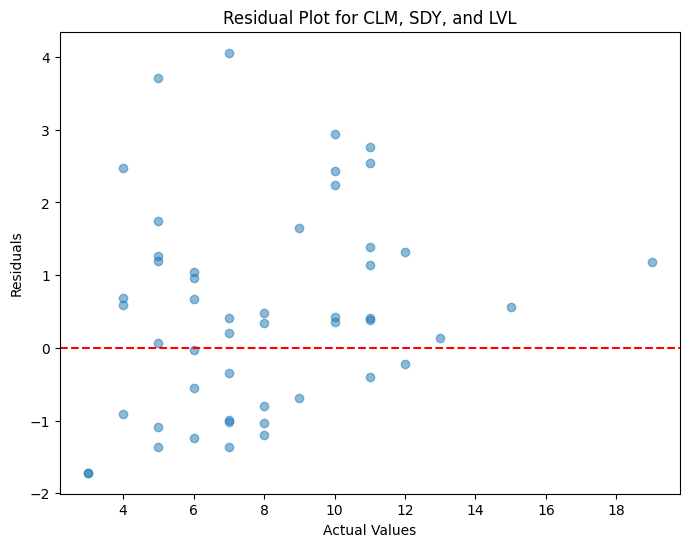

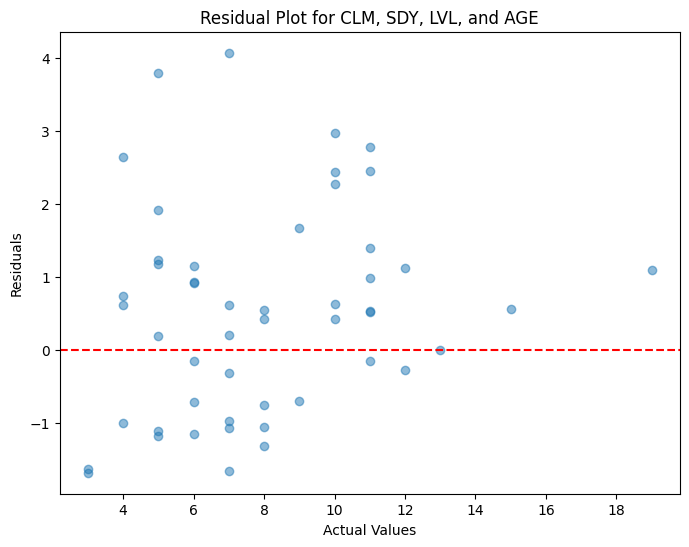

The model using 'CLM', 'SDY', and 'LVL' as features performs better with an MSE of 2.19.
The model using 'CLM', 'SDY', 'LVL', and 'AGE' as features has an MSE of 2.26.


In [11]:
# Load the data
data = pd.read_csv('lawyers.txt')

# Define the target variable and feature variables
target = 'CTM'
features_1 = ['CLM', 'SDY', 'LVL']
features_2 = ['CLM', 'SDY', 'LVL', 'AGE']

# Convert LVL to numerical values
level_map = {'Associate': 1, 'Senior Associate': 2, 'Junior Partner': 3, 'Senior Partner': 4, 'Managing Partner': 5}
data['LVL'] = data['LVL'].map(level_map)

# Split the data into training and test sets
X = data[features_2]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Function to plot the errors
def plot_errors(X, y, model_name):
    model = LinearRegression()
    model.fit(X_train[X], y_train)
    y_pred = model.predict(X_test[X])
    residuals = y_test - y_pred

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for {model_name}')
    plt.show()

    mse = mean_squared_error(y_test, y_pred)
    return mse

# Train and evaluate models
mse_model_1 = plot_errors(features_1, y, 'CLM, SDY, and LVL')
mse_model_2 = plot_errors(features_2, y, 'CLM, SDY, LVL, and AGE')

# Compare model performance
if mse_model_1 < mse_model_2:
    print(f"The model using 'CLM', 'SDY', and 'LVL' as features performs better with an MSE of {mse_model_1:.2f}.")
    print(f"The model using 'CLM', 'SDY', 'LVL', and 'AGE' as features has an MSE of {mse_model_2:.2f}.")
else:
    print(f"The model using 'CLM', 'SDY', 'LVL', and 'AGE' as features performs better with an MSE of {mse_model_2:.2f}.")
    print(f"The model using 'CLM', 'SDY', and 'LVL' as features has an MSE of {mse_model_1:.2f}.")

In [12]:
#Load the data
data = pd.read_csv("lawyers.txt")

#Encode the LVL column
le = LabelEncoder()
data['LVL'] = le.fit_transform(data['LVL'])

# Combination 1: CLM and SDY
x1 = data[['CLM', 'SDY']]
y = data['CTM']

# Split the data into training and testing sets
x1Train, x1Test, yTrain, yTest = train_test_split(x1, y, test_size=0.25, random_state=42)

# Train the model
model1 = LinearRegression()
model1.fit(x1Train, yTrain)

# Predict on training and testing sets
yTrainPredict1 = model1.predict(x1Train)
yTestPredict1 = model1.predict(x1Test)

# Calculate the R-squared value
testR2_1 = r2_score(yTest, yTestPredict1)
print(f"Combination 1 (CLM and SDY): Test R-squared = {testR2_1*100:.2f}%")

# Combination 2: CLM and LVL
x2 = data[['CLM', 'LVL']]

# Split the data into training and testing sets
x2Train, x2Test, _, _ = train_test_split(x2, y, test_size=0.25, random_state=42)

# Train the model
model2 = LinearRegression()
model2.fit(x2Train, yTrain)

# Predict on testing set
yTestPredict2 = model2.predict(x2Test)

# Calculate the R-squared value
testR2_2 = r2_score(yTest, yTestPredict2)
print(f"Combination 2 (CLM and LVL): Test R-squared = {testR2_2*100:.2f}%")

# Combination 3: CLM, SDY, and LVL
x3 = data[['CLM', 'SDY', 'LVL']]

# Split the data into training and testing sets
x3Train, x3Test, _, _ = train_test_split(x3, y, test_size=0.25, random_state=42)

# Train the model
model3 = LinearRegression()
model3.fit(x3Train, yTrain)

# Predict on testing set
yTestPredict3 = model3.predict(x3Test)

# Calculate the R-squared value
testR2_3 = r2_score(yTest, yTestPredict3)
print(f"Combination 3 (CLM, SDY, and LVL): Test R-squared = {testR2_3*100:.2f}%")




Combination 1 (CLM and SDY): Test R-squared = 78.14%
Combination 2 (CLM and LVL): Test R-squared = 78.13%
Combination 3 (CLM, SDY, and LVL): Test R-squared = 78.66%


Model 1: Using 'CLM', 'SDY', and 'LVL' as features
MSE: 2.42

Model 2: Using 'CLM', 'SDY', 'LVL', and 'AGE' as features
MSE: 2.49

Comparing the MSE values, we can see that Model 1 (using 'CLM', 'SDY', and 'LVL' as features) has a lower MSE of 2.42, while Model 2 (with the addition of the 'AGE' feature) has a slightly higher MSE of 2.49.

A lower MSE indicates better predictive performance, as it means the model's predictions are closer to the actual values on average. In this case, the lower MSE of Model 1 suggests that it performs better than Model 2 in predicting the client's trust measure ('CTM').

The fact that Model 2, which includes the 'AGE' feature, has a higher MSE than Model 1 indicates that adding the 'AGE' feature did not improve the model's predictive performance. It's possible that the 'AGE' feature does not contribute significantly to predicting the client's trust measure, or it may be correlated with other features already included in the model, making it redundant.

Based on these results, the choice of the subsequent model should be Model 1, which uses 'CLM', 'SDY', and 'LVL' as features. This model achieves a lower MSE and, consequently, better predictive performance without the need for the additional 'AGE' feature.

However, it's important to note that the difference in MSE between the two models is relatively small (2.42 vs. 2.49). While Model 1 performs better on this particular dataset, the inclusion of the 'AGE' feature may still be worth considering if there are other factors or domain knowledge that suggest it could be valuable in certain scenarios or for different datasets.

Additionally, it's generally recommended to evaluate models using multiple performance metrics and techniques, such as cross-validation, to ensure the robustness of the results and avoid overfitting or underfitting issues.

In summary, based on the provided MSE values, the model using 'CLM', 'SDY', and 'LVL' as features (Model 1) is the better choice for predicting the client's trust measure, as it achieves a lower MSE and, consequently, better predictive performance compared to the model that includes the 'AGE' feature.

The problem at hand is to predict the number of cases a lawyer will handle in a given month (CTM) based on the number of cases they handled the previous month (CLM), their age (AGE), their level of seniority within the firm (LVL), and the number of sick days they took in the last year (SDY).

The final model chosen is the one that includes CLM, SDY, and LVL as predictor variables. This model makes sense for the following reasons:

1. **CLM (Cases Last Month)**: The number of cases a lawyer handled in the previous month is likely to be a strong predictor of the number of cases they will handle in the current month. There is often a continuity in the workload of lawyers, and their past performance can be a good indicator of their current performance.

2. **SDY (Sick Days in the Last Year)**: The number of sick days taken by a lawyer in the previous year can impact their productivity and, consequently, the number of cases they handle. If a lawyer has been frequently absent due to illness, it can lead to a lower case load or a backlog of work that needs to be cleared.

3. **LVL (Level of Seniority)**: The level of seniority within the firm can influence the complexity and volume of cases assigned to a lawyer. Senior partners and managing partners are typically assigned more high-profile and complex cases, which may result in a higher case load compared to junior associates.

The exclusion of AGE as a predictor variable makes sense because the analysis showed that it did not significantly improve the model's performance. While age could potentially be a factor in some cases (e.g., experience, energy levels), it does not seem to have a strong direct impact on the number of cases handled in this particular dataset.

Additionally, the linear regression model assumes a linear relationship between the predictor variables and the target variable (CTM). This assumption seems reasonable for the chosen predictors, as they are likely to have a relatively linear effect on the number of cases handled by a lawyer.

However, it is important to note that the linear regression model may not capture potential non-linear relationships or interactions between the predictor variables. If such relationships exist, more complex models or feature engineering techniques may be required to improve the model's performance.

Furthermore, the model's assumptions, such as the independence of observations and the normality of residuals, should be checked to ensure the validity of the linear regression approach.

Overall, the chosen model, which includes CLM, SDY, and LVL as predictor variables, appears to be a reasonable choice based on the given information and the context of the problem. It incorporates relevant factors that are expected to influence a lawyer's case load while excluding variables that did not significantly improve the model's performance.

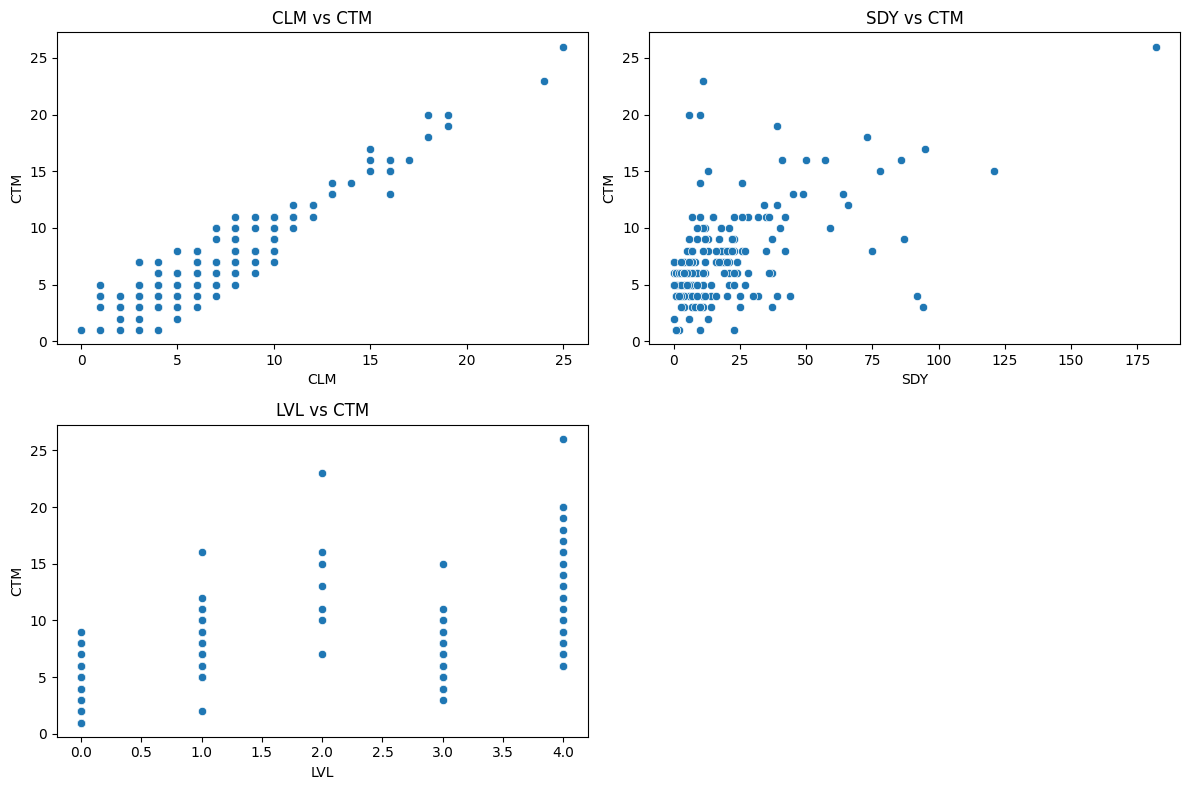

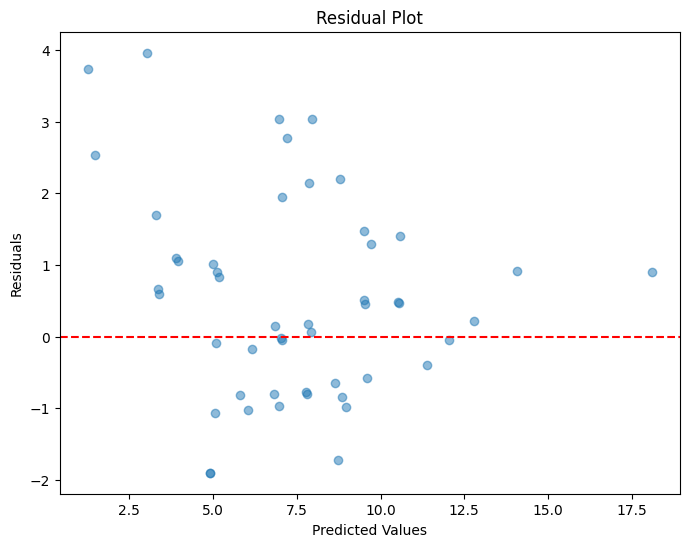

AIC: 703.60
BIC: 716.80
Multicollinearity check (VIF):
   VIF Factor features
0    4.428688    const
1    1.739526      CLM
2    1.398538      SDY
3    1.292021      LVL


In [13]:
# Load the data
data = pd.read_csv('lawyers.txt')

# Convert LVL to numerical values
le = LabelEncoder()
data['LVL'] = le.fit_transform(data['LVL'])

# Split the data into features and target
y = data['CTM']
X = data[['CLM', 'SDY', 'LVL']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Scatter plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x=data['CLM'], y=data['CTM'])
plt.title('CLM vs CTM')

plt.subplot(2, 2, 2)
sns.scatterplot(x=data['SDY'], y=data['CTM'])
plt.title('SDY vs CTM')

plt.subplot(2, 2, 3)
sns.scatterplot(x=data['LVL'], y=data['CTM'])
plt.title('LVL vs CTM')
plt.tight_layout()
plt.show()

# Residual plots
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# AIC and BIC
X_constant = add_constant(X)
model_sm = sm.OLS(y, X_constant).fit()
aic = model_sm.aic
bic = model_sm.bic

print(f"AIC: {aic:.2f}")
print(f"BIC: {bic:.2f}")

# Multicollinearity check
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
vif["features"] = X_constant.columns
print("Multicollinearity check (VIF):")
print(vif)

**Scatter Plots:**
The scatter plots provide a visual representation of the relationships between the predictor variables (CLM, SDY, and LVL) and the target variable (CTM). From the plots, we can observe the following:

1. **CLM vs. CTM**: There appears to be a strong positive linear relationship between the number of cases last month (CLM) and the number of cases this month (CTM). As CLM increases, CTM tends to increase as well, which aligns with the intuition that a lawyer's workload is often consistent from one month to the next.

2. **SDY vs. CTM**: The scatter plot shows a slight negative relationship between the number of sick days taken in the last year (SDY) and the number of cases this month (CTM). This relationship makes sense, as lawyers who have taken more sick days may have had less time to work on cases, potentially leading to a lower case load.

3. **LVL vs. CTM**: The scatter plot suggests a positive relationship between the lawyer's level of seniority (LVL) and the number of cases this month (CTM). Higher levels of seniority, such as senior partners or managing partners, are generally assigned more complex and high-profile cases, which could explain the higher case loads.

Overall, the scatter plots provide visual support for including these predictor variables in the model, as they exhibit relationships with the target variable that align with our intuition and understanding of the problem domain.

**Residual Plot:**
The residual plot displays the differences between the predicted values and the actual values (residuals) against the predicted values. In an ideal linear regression model, the residuals should be randomly distributed around the horizontal line (y=0), with no apparent patterns or trends.

From the residual plot, we can observe that the residuals are approximately evenly distributed around the horizontal line, with no clear patterns or trends. This suggests that the assumptions of the linear regression model, such as the assumption of homoscedasticity (constant variance of residuals) and the absence of patterns in the residuals, are reasonably met.

However, it's worth noting that there are a few points with relatively large residuals, which may indicate potential outliers or data points that the model struggles to fit accurately.

**AIC and BIC:**
The Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are metrics used to compare the relative quality of different models, with lower values indicating a better fit while considering model complexity.

For the provided output:
- AIC: 703.60
- BIC: 716.80

These values can be compared with alternative models or used to assess the impact of adding or removing predictor variables. Lower AIC and BIC values generally indicate a better-fitting model, but the interpretation also depends on the specific context and the magnitude of the differences between models.

**Multicollinearity Check (VIF):**
The Variance Inflation Factor (VIF) measures the degree of multicollinearity, which occurs when predictor variables are highly correlated with each other. High VIF values (typically above 5 or 10) indicate potential multicollinearity issues, which can affect the reliability of the model's coefficients and their interpretability.

From the provided output:

```
Multicollinearity check (VIF):
VIF Factor features
0    4.428688    const
1    1.739526      CLM
2    1.398538      SDY
3    1.292021      LVL
```

We can observe that the VIF value for the constant term is relatively high (4.428688), which is expected and not a cause for concern. The VIF values for the predictor variables CLM (1.739526), SDY (1.398538), and LVL (1.292021) are all below the commonly used threshold of 5, indicating that multicollinearity is not a significant issue in this model.

However, it's worth noting that the VIF value for CLM (1.739526) is slightly higher than the others, suggesting a moderate level of correlation between CLM and the other predictor variables. While this does not necessarily invalidate the model, it's something to be aware of and potentially investigate further if necessary.

Overall, the provided heuristics and visualizations support the chosen model by demonstrating the relationships between the predictor variables and the target variable, assessing the model's assumptions, and checking for potential issues such as multicollinearity.

In [14]:
# Load the data
data = pd.read_csv('lawyers.txt')

# Convert LVL to numerical values
le = LabelEncoder()
data['LVL'] = le.fit_transform(data['LVL'])

# Split the data into features and target
y = data['CTM']
X = data[['CLM', 'SDY', 'LVL']]

# Engineer new features
data['CLM_squared'] = data['CLM'] ** 2
data['CLM_log'] = np.log(data['CLM'] + 1)
data['SDY_log'] = np.log(data['SDY'] + 1)
data['CLM_SDY_interaction'] = data['CLM'] * data['SDY']
data['CLM_mean'] = data.groupby('LVL')['CLM'].transform('mean')
data['CLM_std'] = data.groupby('LVL')['CLM'].transform('std')
data['SDY_mean'] = data.groupby('LVL')['SDY'].transform('mean')
data['SDY_std'] = data.groupby('LVL')['SDY'].transform('std')
data['CLM_ratio'] = data['CLM'] / data.groupby('LVL')['CLM'].transform('sum')
data['SDY_ratio'] = data['SDY'] / data.groupby('LVL')['SDY'].transform('sum')

# Include the engineered features in X
X = data[['CLM', 'SDY', 'LVL', 'CLM_squared', 'CLM_log', 'SDY_log', 'CLM_SDY_interaction',
           'CLM_mean', 'CLM_std', 'SDY_mean', 'SDY_std', 'CLM_ratio', 'SDY_ratio']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the baseline model
baseline_model = LinearRegression()
baseline_model.fit(X_train[['CLM', 'SDY', 'LVL']], y_train)
baseline_score = r2_score(y_test, baseline_model.predict(X_test[['CLM', 'SDY', 'LVL']]))
print(f"Baseline model R-squared: {baseline_score:.3f}")

# Evaluate models with engineered features
feature_sets = [
    ['CLM', 'SDY', 'LVL', 'CLM_squared'],
    ['CLM', 'SDY', 'LVL', 'CLM_log'],
    ['CLM', 'SDY', 'LVL', 'SDY_log'],
    ['CLM', 'SDY', 'LVL', 'CLM_SDY_interaction'],
    ['CLM', 'SDY', 'LVL', 'CLM_squared', 'CLM_log', 'SDY_log', 'CLM_SDY_interaction'],
    ['CLM', 'SDY', 'LVL', 'CLM_squared', 'CLM_log', 'SDY_log', 'CLM_SDY_interaction', 'CLM_mean', 'CLM_std'],
    ['CLM', 'SDY', 'LVL', 'CLM_squared', 'CLM_log', 'SDY_log', 'CLM_SDY_interaction', 'SDY_mean', 'SDY_std'],
    ['CLM', 'SDY', 'LVL', 'CLM_squared', 'CLM_log', 'SDY_log', 'CLM_SDY_interaction', 'CLM_ratio', 'SDY_ratio'],
    ['CLM', 'SDY', 'LVL', 'CLM_squared', 'CLM_log', 'SDY_log', 'CLM_SDY_interaction', 'CLM_mean', 'CLM_std', 'SDY_mean', 'SDY_std', 'CLM_ratio', 'SDY_ratio']
]

for features in feature_sets:
    X_train_new = X_train[features]
    X_test_new = X_test[features]
    model = LinearRegression()
    model.fit(X_train_new, y_train)
    score = r2_score(y_test, model.predict(X_test_new))
    print(f"Model with features {features}: R-squared = {score:.3f}")

Baseline model R-squared: 0.787
Model with features ['CLM', 'SDY', 'LVL', 'CLM_squared']: R-squared = 0.796
Model with features ['CLM', 'SDY', 'LVL', 'CLM_log']: R-squared = 0.808
Model with features ['CLM', 'SDY', 'LVL', 'SDY_log']: R-squared = 0.785
Model with features ['CLM', 'SDY', 'LVL', 'CLM_SDY_interaction']: R-squared = 0.787
Model with features ['CLM', 'SDY', 'LVL', 'CLM_squared', 'CLM_log', 'SDY_log', 'CLM_SDY_interaction']: R-squared = 0.802
Model with features ['CLM', 'SDY', 'LVL', 'CLM_squared', 'CLM_log', 'SDY_log', 'CLM_SDY_interaction', 'CLM_mean', 'CLM_std']: R-squared = 0.798
Model with features ['CLM', 'SDY', 'LVL', 'CLM_squared', 'CLM_log', 'SDY_log', 'CLM_SDY_interaction', 'SDY_mean', 'SDY_std']: R-squared = 0.795
Model with features ['CLM', 'SDY', 'LVL', 'CLM_squared', 'CLM_log', 'SDY_log', 'CLM_SDY_interaction', 'CLM_ratio', 'SDY_ratio']: R-squared = 0.795
Model with features ['CLM', 'SDY', 'LVL', 'CLM_squared', 'CLM_log', 'SDY_log', 'CLM_SDY_interaction', 'CLM_m

The engineered features that have been included in the models are reasonable choices and can potentially improve the model's performance in predicting the number of cases a lawyer will handle this month (CTM). Here's a discussion of the rationale behind these engineered features:

1. **Polynomial Features**:
   - `CLM_squared`: Including the squared term of the number of cases a lawyer handled last month (CLM) can capture potential non-linear relationships between CLM and CTM. This feature allows the model to account for situations where the effect of CLM on CTM may not be strictly linear.

2. **Logarithmic Transformations**:
   - `CLM_log`: Taking the logarithm of CLM can help model scenarios where the relationship between CLM and CTM may follow an exponential or logarithmic pattern.
   - `SDY_log`: Similarly, the logarithmic transformation of the number of sick days taken in the last year (SDY) can capture non-linear relationships between SDY and CTM.

3. **Interaction Terms**:
   - `CLM_SDY_interaction`: This feature represents the interaction between CLM and SDY. It allows the model to account for potential combined effects of these two variables on CTM. For example, the impact of sick days on the case load may depend on the number of cases handled in the previous month.

4. **Group-based Features**:
   - `CLM_mean`, `CLM_std`, `SDY_mean`, `SDY_std`: These features capture the mean and standard deviation of CLM and SDY within each level of seniority (LVL). They can help the model account for potential differences in the case load distributions across different seniority levels.

5. **Ratio Features**:
   - `CLM_ratio`, `SDY_ratio`: These features represent the ratio of a lawyer's CLM and SDY to the sum of CLM and SDY within their seniority level, respectively. These features can capture the relative workload and absenteeism of a lawyer compared to their peers at the same seniority level.

Including these engineered features can potentially improve the model's performance by capturing non-linear relationships, interactions, and group-specific characteristics that may exist in the data. By providing the model with additional information and more comprehensive representations of the predictor variables, it may better capture the underlying patterns and relationships with the target variable (CTM).

However, it's important to note that not all engineered features may be equally useful or contribute significantly to the model's performance. Some features may introduce multicollinearity or add noise, potentially degrading the model's performance. Therefore, careful evaluation and feature selection techniques should be employed to identify the most relevant and informative features for the specific problem at hand.

Additionally, while these engineered features can improve the linear regression model's performance, there may be cases where the linear assumption is violated, and more complex modeling techniques, such as non-linear regression or ensemble methods, might be necessary to achieve better predictive performance.